In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.3 MB/s eta 0:00:00


In [3]:
!pip install implicit
from implicit.bpr import BayesianPersonalizedRanking

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 32.7 MB/s eta 0:00:00


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
final = pd.read_csv('/content/drive/MyDrive/최종프로젝트/final.csv')
final_enco = pd.read_csv('/content/drive/MyDrive/최종프로젝트/fi_inco.csv')

In [6]:
final.reset_index(inplace=True)
final

,level_0,index,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,GENDER,AGE,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물
0,0,0,15110,2197182,C,2,25,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,56423,254040,C,2,28,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,1659127,5420542,C,2,46,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3,817293,5884271,C,1,41,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,4,4,798115,6197631,C,1,54,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,58422,58424,1892963,8605817,C,1,36,3,6,4,7,10,1,0,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
58423,58423,58425,1898196,5285028,C,1,25,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
58424,58424,58426,1942749,6650657,C,1,24,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
58425,58425,58427,1946706,8536828,C,2,52,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [7]:
final = final.drop(columns=['index'])
final

,level_0,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,GENDER,AGE,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물
0,0,15110,2197182,C,2,25,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,56423,254040,C,2,28,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1659127,5420542,C,2,46,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,817293,5884271,C,1,41,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,4,798115,6197631,C,1,54,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,58422,1892963,8605817,C,1,36,3,6,4,7,10,1,0,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
58423,58423,1898196,5285028,C,1,25,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
58424,58424,1942749,6650657,C,1,24,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
58425,58425,1946706,8536828,C,2,52,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [8]:
final.columns

Index(['level_0', 'JOIN_SN', 'POL_SN', 'CT_RLPS_GBN_CD', 'GENDER', 'AGE',
       'AGE_GROUP', 'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD',
       'CT_PY_AMT', 'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT', 'GBN_CD_1',
       'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4', '총지급금액', '총지급 건수', '기타', '배책',
       '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물'],
      dtype='object')

In [9]:
num = ['CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '기타', '배책',
       '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물']
cate = ['GENDER', 'AGE_GROUP', 'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD',
       'CT_PY_CYCLE_CD', 'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4']

In [10]:
final_enco.reset_index(inplace=True)
final_enco = final_enco.drop(columns=['index'])
final_enco

,level_0,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2
0,0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2,1659127,5420542,2,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,3,817293,5884271,1,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,4,798115,6197631,1,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,58422,1892963,8605817,1,3,6,4,7,10,1,0,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
58423,58423,1898196,5285028,1,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
58424,58424,1942749,6650657,1,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
58425,58425,1946706,8536828,2,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [ ]:
exclude_col = ['level_0', 'JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP', 'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT', 'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT',
               '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물']

In [ ]:
for_bpr = final_enco.drop(columns=exclude_col)
for_bpr

In [11]:
final_enco.columns

Index(['level_0', 'JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP', 'reduce_GBN_CD',
       'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT', 'CT_PY_CYCLE_CD',
       'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4',
       '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원',
       '화재/재물', '연령대_0', '연령대_1', '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6',
       '연령대_7', '연령대_8', '보험종류_1', '보험종류_2', '보험종류_3', '보험종류_4', '보험종류_5',
       '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9', '보험상태_1', '보험상태_2', '보험상태_3',
       '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7',
       '채널_99', '납입주기_1', '납입주기_2', '납입주기_3', '납입주기_99', '성별_1', '성별_2'],
      dtype='object')

In [15]:
dimen_red_insu_type = final_enco[['보험종류_1', '보험종류_2', '보험종류_3', '보험종류_4', '보험종류_5', '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9']]
dimen_red_stat = final_enco[['보험상태_1', '보험상태_2', '보험상태_3', '보험상태_4']]
dimen_red_channel = final_enco[['채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7', '채널_99']]
dimen_red_pyCycle = final_enco[['납입주기_1', '납입주기_2', '납입주기_3', '납입주기_99']]

In [50]:
dimen_red_cover = final_enco[['GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4']]

In [16]:
dimen_red_claim = final_enco[['총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물']]

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

In [18]:
dimen_red_claim_pca = pca.fit_transform(dimen_red_claim)

In [21]:
dimen_red_claim_pca.shape

(58427, 1)

In [23]:
from scipy.sparse import csr_matrix

In [36]:
bpr =  BayesianPersonalizedRanking(factors=1)

In [25]:
dimen_red_insu_type2 = csr_matrix(dimen_red_insu_type)
dimen_red_stat2 = csr_matrix(dimen_red_stat)
dimen_red_channel2 = csr_matrix(dimen_red_channel)
dimen_red_pyCycle2 = csr_matrix(dimen_red_pyCycle)

In [51]:
dimen_red_cover2 = csr_matrix(dimen_red_cover)

In [41]:
bpr =  BayesianPersonalizedRanking(factors=1)
bpr.fit(dimen_red_insu_type2)
dimen_red_insu_type_bpr = bpr.user_factors

bpr =  BayesianPersonalizedRanking(factors=1)
bpr.fit(dimen_red_stat2)
dimen_red_stat_bpr = bpr.user_factors

bpr =  BayesianPersonalizedRanking(factors=1)
bpr.fit(dimen_red_channel2)
dimen_red_channel_bpr = bpr.user_factors

bpr =  BayesianPersonalizedRanking(factors=1)
bpr.fit(dimen_red_pyCycle2)
dimen_red_pyCycle_bpr = bpr.user_factors

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [52]:
bpr =  BayesianPersonalizedRanking(factors=1)
bpr.fit(dimen_red_cover2)
dimen_red_cover_bpr = bpr.user_factors

  0%|          | 0/100 [00:00<?, ?it/s]

In [53]:
dimen_red_cover_bpr

array([[-0.12941693,  1.        ],
       [-0.1862549 ,  1.        ],
       [-0.04726158,  1.        ],
       ...,
       [ 0.09429488,  1.        ],
       [ 0.28877726,  1.        ],
       [-0.1066003 ,  1.        ]], dtype=float32)

In [42]:
dimen_red_insu_type_bpr

array([[ 0.5646528 ,  1.        ],
       [ 0.12969059,  1.        ],
       [ 0.2436004 ,  1.        ],
       ...,
       [ 0.06922794,  1.        ],
       [ 0.05983355,  1.        ],
       [-0.01384693,  1.        ]], dtype=float32)

In [46]:
dimen_red_insu_type_bpr.shape

(58427, 2)

In [43]:
dimen_red_stat_bpr

array([[-0.423223  ,  1.        ],
       [ 0.15857986,  1.        ],
       [-0.10441022,  1.        ],
       ...,
       [ 0.456218  ,  1.        ],
       [ 0.30242705,  1.        ],
       [ 0.06914125,  1.        ]], dtype=float32)

In [47]:
dimen_red_stat_bpr.shape

(58427, 2)

In [44]:
dimen_red_channel_bpr

array([[ 0.09022811,  1.        ],
       [ 0.18235078,  1.        ],
       [ 0.06660569,  1.        ],
       ...,
       [-0.034819  ,  1.        ],
       [ 0.48798394,  1.        ],
       [ 0.23136151,  1.        ]], dtype=float32)

In [48]:
dimen_red_channel_bpr.shape

(58427, 2)

In [45]:
dimen_red_pyCycle_bpr

array([[0.5394183 , 1.        ],
       [0.37924248, 1.        ],
       [0.14459905, 1.        ],
       ...,
       [0.5016279 , 1.        ],
       [0.43382576, 1.        ],
       [0.7522492 , 1.        ]], dtype=float32)

In [49]:
dimen_red_pyCycle_bpr.shape

(58427, 2)

In [54]:
bpr_df1 = pd.DataFrame(dimen_red_insu_type_bpr, columns=['보종', '2']).drop(columns=['2'])
bpr_df2 = pd.DataFrame(dimen_red_stat_bpr, columns=['보험상태', '2']).drop(columns=['2'])
bpr_df3 = pd.DataFrame(dimen_red_channel_bpr, columns=['가입채널', '2']).drop(columns=['2'])
bpr_df4 = pd.DataFrame(dimen_red_pyCycle_bpr, columns=['납입주기', '2']).drop(columns=['2'])
bpr_df5 = pd.DataFrame(dimen_red_cover_bpr, columns=['담보', '2']).drop(columns=['2'])

In [56]:
pca_df = pd.DataFrame(dimen_red_claim_pca, columns=['보험금지급'])

In [57]:
final_bpr = pd.concat([final_enco, bpr_df1, bpr_df2, bpr_df3, bpr_df4, bpr_df5, pca_df], axis=1)
final_bpr

,level_0,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,보종,보험상태,가입채널,납입주기,담보,보험금지급
0,0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0.564653,-0.423223,0.090228,0.539418,-0.129417,-106.604397
1,1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.129691,0.158580,0.182351,0.379242,-0.186255,-106.604397
2,2,1659127,5420542,2,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0.243600,-0.104410,0.066606,0.144599,-0.047262,-106.604397
3,3,817293,5884271,1,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,-0.204043,0.462272,-0.079714,0.621445,-0.112550,-106.604397
4,4,798115,6197631,1,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.214953,0.091543,-0.447916,0.188792,-0.174491,-106.604397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,58422,1892963,8605817,1,3,6,4,7,10,1,0,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,-0.414533,-0.038298,0.347487,0.460547,-0.325619,-106.604397
58423,58423,1898196,5285028,1,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0.117446,0.593836,0.008225,0.469574,0.371331,-106.604397
58424,58424,1942749,6650657,1,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0.069228,0.456218,-0.034819,0.501628,0.094295,-106.604397
58425,58425,1946706,8536828,2,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0.059834,0.302427,0.487984,0.433826,0.288777,-106.604397


In [58]:
final_bpr.columns

Index(['level_0', 'JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP', 'reduce_GBN_CD',
       'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT', 'CT_PY_CYCLE_CD',
       'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4',
       '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원',
       '화재/재물', '연령대_0', '연령대_1', '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6',
       '연령대_7', '연령대_8', '보험종류_1', '보험종류_2', '보험종류_3', '보험종류_4', '보험종류_5',
       '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9', '보험상태_1', '보험상태_2', '보험상태_3',
       '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7',
       '채널_99', '납입주기_1', '납입주기_2', '납입주기_3', '납입주기_99', '성별_1', '성별_2', '보종',
       '보험상태', '가입채널', '납입주기', '담보', '보험금지급'],
      dtype='object')

In [59]:
drops = ['level_0', 'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT', 'CT_PY_CYCLE_CD',
       'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4',
       '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원',
       '화재/재물', '연령대_0', '연령대_1', '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6',
       '연령대_7', '연령대_8', '보험종류_1', '보험종류_2', '보험종류_3', '보험종류_4', '보험종류_5',
       '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9', '보험상태_1', '보험상태_2', '보험상태_3',
       '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7',
       '채널_99', '납입주기_1', '납입주기_2', '납입주기_3', '납입주기_99', '성별_1', '성별_2']

In [60]:
final_bpr_drop = final_bpr.drop(columns=drops)
final_bpr_drop

,JOIN_SN,POL_SN,GENDER,AGE_GROUP,CT_PY_PD,mean_AMT,보종,보험상태,가입채널,납입주기,담보,보험금지급
0,15110,2197182,2,2,0,5000.0,0.564653,-0.423223,0.090228,0.539418,-0.129417,-106.604397
1,56423,254040,2,2,5,170.0,0.129691,0.158580,0.182351,0.379242,-0.186255,-106.604397
2,1659127,5420542,2,4,3,180.0,0.243600,-0.104410,0.066606,0.144599,-0.047262,-106.604397
3,817293,5884271,1,4,0,110.0,-0.204043,0.462272,-0.079714,0.621445,-0.112550,-106.604397
4,798115,6197631,1,5,20,50.0,0.214953,0.091543,-0.447916,0.188792,-0.174491,-106.604397
...,...,...,...,...,...,...,...,...,...,...,...,...
58422,1892963,8605817,1,3,0,10.0,-0.414533,-0.038298,0.347487,0.460547,-0.325619,-106.604397
58423,1898196,5285028,1,2,0,1.0,0.117446,0.593836,0.008225,0.469574,0.371331,-106.604397
58424,1942749,6650657,1,2,0,6.0,0.069228,0.456218,-0.034819,0.501628,0.094295,-106.604397
58425,1946706,8536828,2,5,0,8.0,0.059834,0.302427,0.487984,0.433826,0.288777,-106.604397


In [61]:
final_bpr_drop.columns

Index(['JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP', 'CT_PY_PD', 'mean_AMT',
       '보종', '보험상태', '가입채널', '납입주기', '담보', '보험금지급'],
      dtype='object')

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [63]:
final_bpr_drop_kmeans = final_bpr_drop[['GENDER', 'AGE_GROUP', 'CT_PY_PD', 'mean_AMT',
                                      '보종', '보험상태', '가입채널', '납입주기', '담보', '보험금지급']]
final_bpr_drop_kmeans

,GENDER,AGE_GROUP,CT_PY_PD,mean_AMT,보종,보험상태,가입채널,납입주기,담보,보험금지급
0,2,2,0,5000.0,0.564653,-0.423223,0.090228,0.539418,-0.129417,-106.604397
1,2,2,5,170.0,0.129691,0.158580,0.182351,0.379242,-0.186255,-106.604397
2,2,4,3,180.0,0.243600,-0.104410,0.066606,0.144599,-0.047262,-106.604397
3,1,4,0,110.0,-0.204043,0.462272,-0.079714,0.621445,-0.112550,-106.604397
4,1,5,20,50.0,0.214953,0.091543,-0.447916,0.188792,-0.174491,-106.604397
...,...,...,...,...,...,...,...,...,...,...
58422,1,3,0,10.0,-0.414533,-0.038298,0.347487,0.460547,-0.325619,-106.604397
58423,1,2,0,1.0,0.117446,0.593836,0.008225,0.469574,0.371331,-106.604397
58424,1,2,0,6.0,0.069228,0.456218,-0.034819,0.501628,0.094295,-106.604397
58425,2,5,0,8.0,0.059834,0.302427,0.487984,0.433826,0.288777,-106.604397


In [64]:
scaler = StandardScaler()
final_bpr_drop_kmeans.loc[:,:] = scaler.fit_transform(final_bpr_drop_kmeans)
final_bpr_drop_kmeans

,GENDER,AGE_GROUP,CT_PY_PD,mean_AMT,보종,보험상태,가입채널,납입주기,담보,보험금지급
0,0.961330,-1.447663,-1.432027,5.485298,1.824279,-1.455862,0.295443,1.784030,-0.447905,-0.093828
1,0.961330,-1.447663,-1.012055,-0.031289,0.419253,0.543239,0.597254,1.255216,-0.639858,-0.093828
2,0.961330,-0.174653,-1.180044,-0.019868,0.787207,-0.360407,0.218052,0.480550,-0.170451,-0.093828
3,-1.040225,-0.174653,-1.432027,-0.099818,-0.658782,1.586740,-0.261318,2.054838,-0.390942,-0.093828
4,-1.040225,0.461852,0.247863,-0.168347,0.694669,0.312898,-1.467617,0.626450,-0.600130,-0.093828
...,...,...,...,...,...,...,...,...,...,...
58422,-1.040225,-0.811158,-1.432027,-0.214034,-1.338713,-0.133243,1.138270,1.523640,-1.110515,-0.093828
58423,-1.040225,-1.447663,-1.432027,-0.224313,0.379699,2.038799,0.026787,1.553443,1.243218,-0.093828
58424,-1.040225,-1.447663,-1.432027,-0.218602,0.223945,1.565937,-0.114235,1.659267,0.307613,-0.093828
58425,0.961330,0.461852,-1.432027,-0.216318,0.193599,1.037504,1.598566,1.435421,0.964417,-0.093828


In [ ]:
n_clusters = 5

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(final_bpr_drop_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
final_bpr_drop_kmeans['군집'] = kmeans.labels_
final_bpr_drop_kmeans

In [66]:
from sklearn.metrics import silhouette_score, silhouette_samples

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

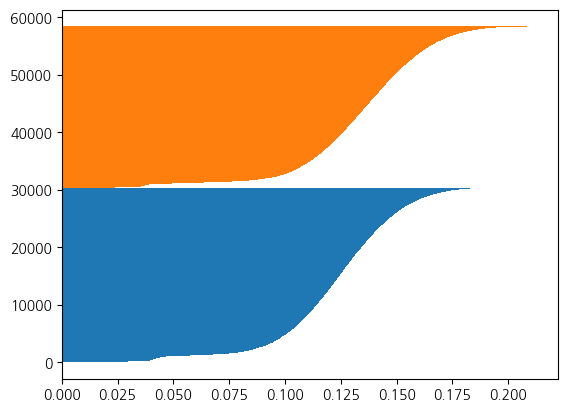

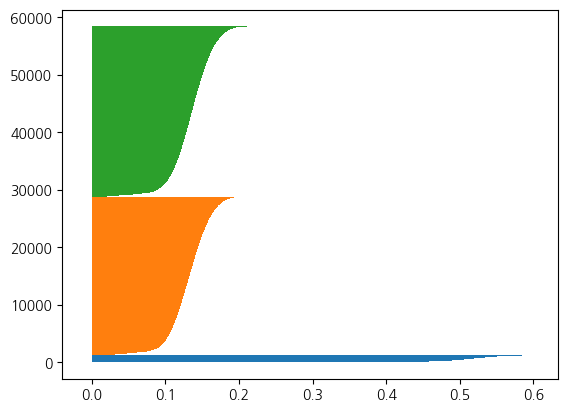

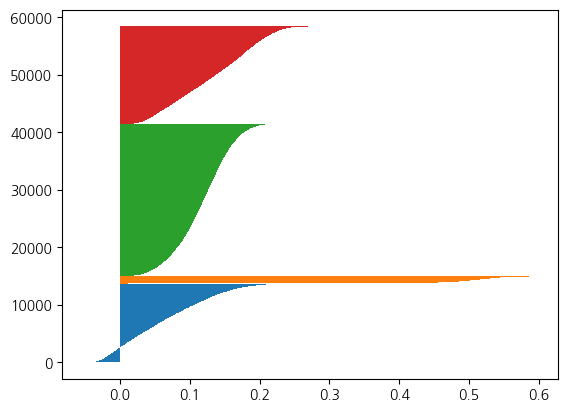

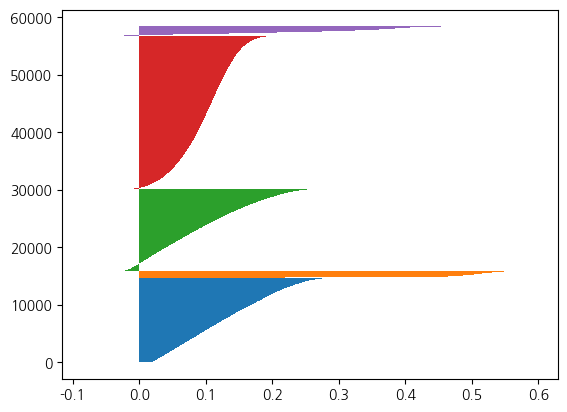

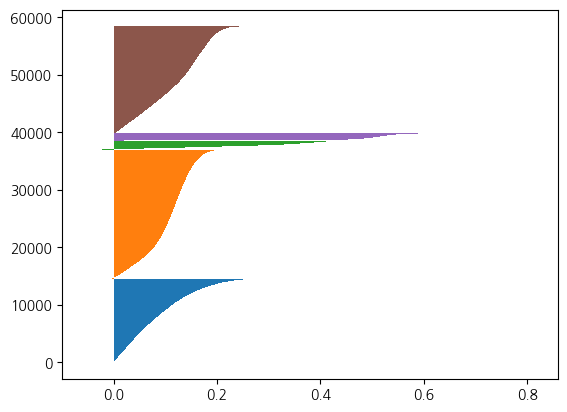

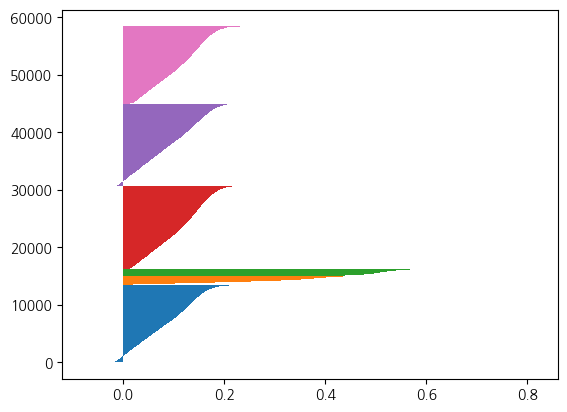

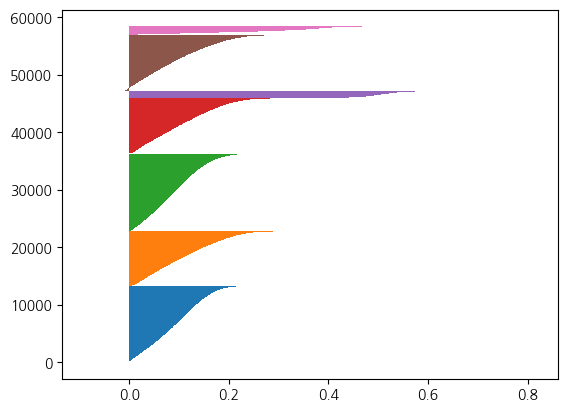

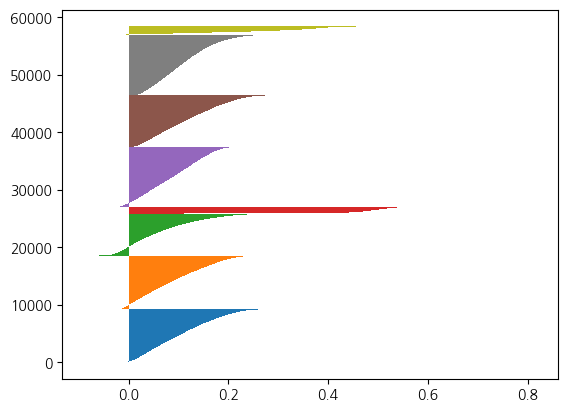

In [67]:
for k in range(2, 10):
    fig, ax = plt.subplots(1, 1)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(final_bpr_drop_kmeans)
    silhouette_vals = silhouette_samples(final_bpr_drop_kmeans, kmeans.labels_)
    y_ticks = []
    y_lower = y_upper = 0

    for c_num in np.unique(kmeans.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort()

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        y_lower += len(cluster_silhouette_vals)

# DBSCAN

In [68]:
from sklearn.cluster import DBSCAN

## eps=2, min_samples=100

In [69]:
dbscan = DBSCAN(eps=2, min_samples=100)

In [70]:
final_bpr_drop_cate_dbscan = final_bpr_drop_kmeans.copy()
X = final_bpr_drop_cate_dbscan

In [72]:
dbscan.fit(X)
final_bpr['군집'] = dbscan.fit_predict(X)

In [73]:
final_bpr

,level_0,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,보종,보험상태,가입채널,납입주기,담보,보험금지급,군집
0,0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0.564653,-0.423223,0.090228,0.539418,-0.129417,-106.604397,2
1,1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.129691,0.158580,0.182351,0.379242,-0.186255,-106.604397,0
2,2,1659127,5420542,2,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0.243600,-0.104410,0.066606,0.144599,-0.047262,-106.604397,0
3,3,817293,5884271,1,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,-0.204043,0.462272,-0.079714,0.621445,-0.112550,-106.604397,1
4,4,798115,6197631,1,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.214953,0.091543,-0.447916,0.188792,-0.174491,-106.604397,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,58422,1892963,8605817,1,3,6,4,7,10,1,0,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,-0.414533,-0.038298,0.347487,0.460547,-0.325619,-106.604397,1
58423,58423,1898196,5285028,1,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0.117446,0.593836,0.008225,0.469574,0.371331,-106.604397,1
58424,58424,1942749,6650657,1,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0.069228,0.456218,-0.034819,0.501628,0.094295,-106.604397,1
58425,58425,1946706,8536828,2,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0.059834,0.302427,0.487984,0.433826,0.288777,-106.604397,0


In [75]:
final_bpr.groupby(['군집'])['level_0'].size().reset_index()
# eps=2, min_samples=100

,군집,level_0
0,-1,1129
1,0,29129
2,1,27014
3,2,701
4,3,454


In [76]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [77]:
tsne = TSNE(n_components=3, random_state=42)

In [78]:
X_tsne = tsne.fit_transform(X)

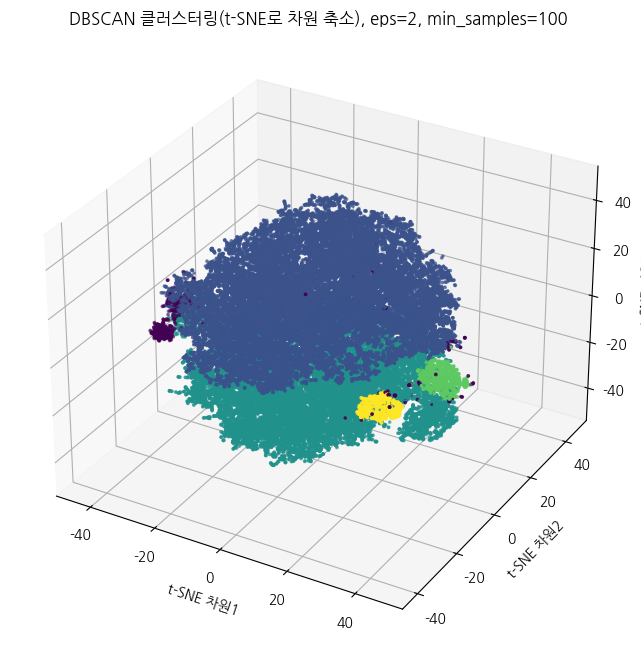

In [80]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=final_bpr['군집'], cmap='viridis', marker='o', s=3)
ax.set_title('DBSCAN 클러스터링(t-SNE로 차원 축소), eps=2, min_samples=100')
ax.set_xlabel('t-SNE 차원1')
ax.set_ylabel('t-SNE 차원2')
ax.set_zlabel('t-SNE 차원3')
plt.show()

In [ ]:
clust_1 = final_bpr_drop_cate_dbscan[final_bpr_drop_cate_dbscan['군집'] == -1]
clust0 = final_bpr_drop_cate_dbscan[final_bpr_drop_cate_dbscan['군집'] == 0]
clust1 = final_bpr_drop_cate_dbscan[final_bpr_drop_cate_dbscan['군집'] == 1]
clust2 = final_bpr_drop_cate_dbscan[final_bpr_drop_cate_dbscan['군집'] == 2]
clust3 = final_bpr_drop_cate_dbscan[final_bpr_drop_cate_dbscan['군집'] == 3]

In [ ]:
clust_1

In [ ]:
clust0

In [ ]:
for column in clust_1.columns:
    unique_count = clust_1[column].nunique()
    print(f"{column}: {unique_count}")

In [ ]:
for column in clust0.columns:
    unique_count = clust0[column].nunique()
    print(f"{column}: {unique_count}")

In [ ]:
clust_1['총지급 건수'].unique()

In [ ]:
clust0['총지급 건수'].unique()

In [ ]:
clust_1['배책'].unique()

In [ ]:
clust0['배책'].unique()

## eps=, min_samples=

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=500)

In [ ]:
final_bpr_drop_cate_dbscan = final_bpr_drop_kmeans.copy()
X = final_bpr_drop_cate_dbscan

In [ ]:
dbscan.fit(X)
final_bpr['군집'] = dbscan.fit_predict(X)

In [ ]:
final_bpr

,level_0,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,보종,보험상태,가입채널,납입주기,담보,보험금지급,군집
0,0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0.564653,-0.423223,0.090228,0.539418,-0.129417,-106.604397,2
1,1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.129691,0.158580,0.182351,0.379242,-0.186255,-106.604397,0
2,2,1659127,5420542,2,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0.243600,-0.104410,0.066606,0.144599,-0.047262,-106.604397,0
3,3,817293,5884271,1,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,-0.204043,0.462272,-0.079714,0.621445,-0.112550,-106.604397,1
4,4,798115,6197631,1,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.214953,0.091543,-0.447916,0.188792,-0.174491,-106.604397,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,58422,1892963,8605817,1,3,6,4,7,10,1,0,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,-0.414533,-0.038298,0.347487,0.460547,-0.325619,-106.604397,1
58423,58423,1898196,5285028,1,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0.117446,0.593836,0.008225,0.469574,0.371331,-106.604397,1
58424,58424,1942749,6650657,1,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0.069228,0.456218,-0.034819,0.501628,0.094295,-106.604397,1
58425,58425,1946706,8536828,2,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0.059834,0.302427,0.487984,0.433826,0.288777,-106.604397,0


In [ ]:
final_bpr.groupby(['군집'])['level_0'].size().reset_index()
# eps=2, min_samples=100

,군집,level_0
0,-1,1129
1,0,29129
2,1,27014
3,2,701
4,3,454


In [ ]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
tsne = TSNE(n_components=3, random_state=42)

In [ ]:
X_tsne = tsne.fit_transform(X)

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=final_bpr_drop_cate_dbscan['군집'], cmap='viridis', marker='o', s=3)
ax.set_title('DBSCAN 클러스터링(t-SNE로 차원 축소), eps=2, min_samples=100')
ax.set_xlabel('t-SNE 차원1')
ax.set_ylabel('t-SNE 차원2')
ax.set_zlabel('t-SNE 차원3')
plt.show()

#HDBSCAN

In [83]:
!pip install hdbscan
import hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 25.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039281 sha256=e7a3eb55bb1e278123a52189fa75063fffb6f502ac9bc59e4dadcffbe8a59fa8
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [85]:
final_bpr2 = final_bpr.copy()

In [93]:
hdb = hdbscan.HDBSCAN(min_cluster_size=10)

In [94]:
final_bpr2['군집'] = hdb.fit_predict(X)

In [91]:
final_bpr2

,level_0,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,보종,보험상태,가입채널,납입주기,담보,보험금지급,군집
0,0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0.564653,-0.423223,0.090228,0.539418,-0.129417,-106.604397,3
1,1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.129691,0.158580,0.182351,0.379242,-0.186255,-106.604397,5
2,2,1659127,5420542,2,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0.243600,-0.104410,0.066606,0.144599,-0.047262,-106.604397,5
3,3,817293,5884271,1,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,-0.204043,0.462272,-0.079714,0.621445,-0.112550,-106.604397,14
4,4,798115,6197631,1,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.214953,0.091543,-0.447916,0.188792,-0.174491,-106.604397,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,58422,1892963,8605817,1,3,6,4,7,10,1,0,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,-0.414533,-0.038298,0.347487,0.460547,-0.325619,-106.604397,14
58423,58423,1898196,5285028,1,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0.117446,0.593836,0.008225,0.469574,0.371331,-106.604397,14
58424,58424,1942749,6650657,1,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0.069228,0.456218,-0.034819,0.501628,0.094295,-106.604397,14
58425,58425,1946706,8536828,2,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0.059834,0.302427,0.487984,0.433826,0.288777,-106.604397,5


In [88]:
# final_bpr2.groupby(['군집'])['level_0'].size().reset_index()
# min_cluster_size=2 했을 때

,군집,level_0
0,-1,2
1,0,4
2,1,58421


In [92]:
final_bpr2.groupby(['군집'])['level_0'].size().reset_index()
# min_cluster_size=5 했을 때

,군집,level_0
0,-1,3393
1,0,21
2,1,21
3,2,463
4,3,688
5,4,94
6,5,29074
7,6,68
8,7,5
9,8,5


In [95]:
final_bpr2.groupby(['군집'])['level_0'].size().reset_index()
# min_cluster_size=10 했을 때

,군집,level_0
0,-1,1625
1,0,28
2,1,457
3,2,695
4,3,44
5,4,28858
6,5,26
7,6,26694
